# Loading Data

In [200]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
%matplotlib inline

In [201]:
DATA_SRC='./Data/Dataset.csv'
df = pd.read_csv(DATA_SRC)

df.sort_values('MatchID', inplace = True)
df.head()

,MatchID,Home_team,Away_team,Score_home,Score_away,Possession_home,Possession_away,Shots_on_target_home,Shots_on_target_away,Shots_home,...,Corners_home,Corners_away,Offsides_home,Offsides_away,Yellow_cards_home,Yellow_cards_away,Fouls_conceded_home,Fouls_conceded_away,Red_cards_home,Red_cards_away
0,5567,Arsenal,Aston Villa,1,1,72.9,27.1,7.0,3.0,24.0,...,18.0,1.0,2.0,6.0,1.0,2.0,10.0,19.0,0.0,0.0
1,5568,Bolton,Spurs,2,0,37.8,62.2,4.0,2.0,13.0,...,6.0,3.0,3.0,1.0,0.0,0.0,22.0,22.0,0.0,0.0
2,5569,Everton,Watford,2,1,47.0,53.0,2.0,7.0,8.0,...,0.0,6.0,5.0,1.0,2.0,2.0,12.0,15.0,0.0,0.0
3,5570,Newcastle,Wigan,2,1,55.3,44.7,5.0,4.0,8.0,...,4.0,11.0,6.0,3.0,1.0,2.0,18.0,19.0,0.0,0.0
4,5571,Portsmouth,Blackburn,3,0,44.3,55.7,11.0,3.0,21.0,...,6.0,2.0,5.0,0.0,2.0,0.0,22.0,17.0,0.0,1.0


데이터셋을 불러서 ```MatchID```, ```Home_team```, ```Away_team``` 등의 column을 drop한 DataFrame을 ```df_```에 저장  
필요시 함수를 만들어서 feature를 가공해 덧붙일 수 있음(ex. 유효 슈팅 / 슈팅)

In [202]:
df = df[df.Score_home > 0]
df = df[df.Score_away > 0]
df = df[df.Score_home < 3]
df = df[df.Score_away < 3]
df_ = df.drop(columns = ['MatchID', 'Home_team', 'Away_team', 'Score_home', 'Score_away'])
print(len(df_.columns))
list(df_)
#df_.hist()

24


['Possession_home',
 'Possession_away',
 'Shots_on_target_home',
 'Shots_on_target_away',
 'Shots_home',
 'Shots_away',
 'Touches_home',
 'Touches_away',
 'Passes_home',
 'Passes_away',
 'Tackles_home',
 'Tackles_away',
 'Clearances_home',
 'Clearances_away',
 'Corners_home',
 'Corners_away',
 'Offsides_home',
 'Offsides_away',
 'Yellow_cards_home',
 'Yellow_cards_away',
 'Fouls_conceded_home',
 'Fouls_conceded_away',
 'Red_cards_home',
 'Red_cards_away']

Correlation matrix를 보기 위해 seaborn을 import하고, home team과 away team의 features 간 correlation 출력  
사실 home team과 away team의 승률에 약간 차이가 나서 home/away에 따른 차이가 있을 줄 알고 그래프를 만들어 보았는데  
딱히 두드러지는 차이점은 없었음

['Possession_home',
 'Shots_on_target_home',
 'Shots_home',
 'Touches_home',
 'Passes_home',
 'Tackles_home',
 'Clearances_home',
 'Corners_home',
 'Offsides_home',
 'Yellow_cards_home',
 'Fouls_conceded_home',
 'Red_cards_home']

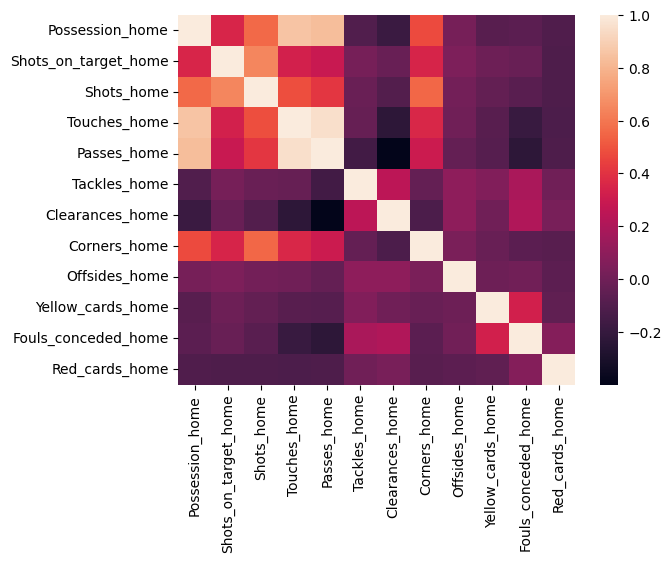

In [203]:
import seaborn as sbn

home_features = [f for f in list(df_) if 'home' in f]
df_home = df_[home_features]  #home team features를 담은 DataFrame 임시 생성
home_corr_matrix = df_home.corr()

sbn.heatmap(home_corr_matrix)
list(df_home)

<AxesSubplot:>

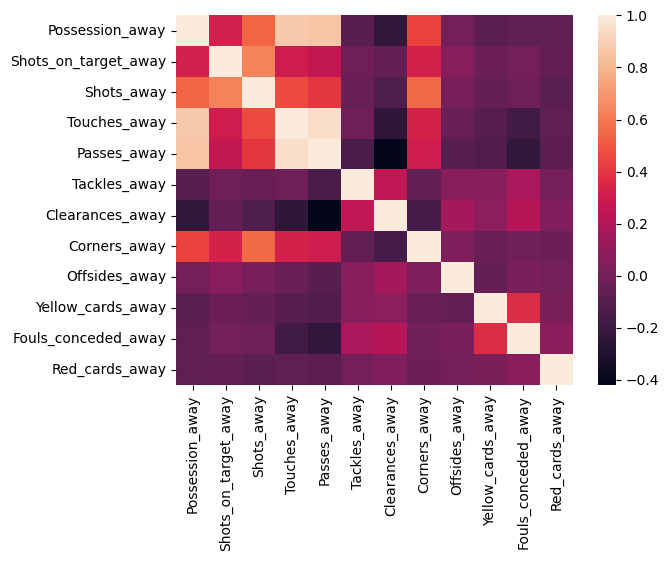

In [204]:
away_features = [f for f in list(df_) if 'away' in f]
away_corr_matrix = df_[away_features].corr()
df_away = df_[away_features] #임시 생성

sbn.heatmap(away_corr_matrix)

## Modeling

우선 Logistic Regression과 Linear Regression Model을 import해서 deploy 해보았음

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold

from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
kf = KFold(n_splits=4)

### Linear Regression

In [206]:
X = df_.values
y = df['Score_home'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lin_reg.fit(X_train, y_train)
    some_data = X_test[:5]
    some_labels = y_test[:5]
    print('Prediction: ', lin_reg.predict(some_data))
    print('Labels: ', list(some_labels))
    
    goal_predictions = lin_reg.predict(df_.values)
    lin_mse = mean_squared_error(y, goal_predictions)
    lin_rmse = np.sqrt(lin_mse)
    print('RMSE: ', lin_rmse)

Prediction:  [1.66245333 1.8380986  1.59935655 1.84723556 1.2124981 ]
Labels:  [1, 2, 2, 1, 1]
RMSE:  0.46575417286842574
Prediction:  [1.31126677 1.33389477 1.27768186 1.54772708 1.23884511]
Labels:  [2, 2, 1, 2, 1]
RMSE:  0.4605044247766542
Prediction:  [1.42286129 1.33736883 1.48410304 1.52605376 1.0151552 ]
Labels:  [2, 1, 1, 1, 1]
RMSE:  0.46082772843779046
Prediction:  [1.41316494 1.5104769  1.40571705 1.47897034 1.42338918]
Labels:  [2, 1, 1, 1, 1]
RMSE:  0.4616175686283122


In [207]:
some_data = df_.iloc[:15]
some_labels = df['Score_home'][:15]
print('Prediction: ', lin_reg.predict(some_data))
print('Labels: ', list(some_labels))

Prediction:  [1.50602628 1.65945601 1.53228703 1.56876536 1.18606044 1.74904685
 1.75051331 1.4814863  1.32580544 1.72236876 1.35225066 1.59853668
 1.77686706 1.15665937 1.27474249]
Labels:  [1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1]


In [208]:
goal_predictions = lin_reg.predict(df_.values)
lin_mse = mean_squared_error(y, goal_predictions)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: ', lin_rmse)

RMSE:  0.4616175686283122


____

## Standardization

Standardizaion을 해도 왜 결과가 똑같을까

In [209]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_))

X_std = df_scaled.values
y_std = df['Score_home'].values

X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size = .2, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X_std, y_std)

for train_index, test_index in kf.split(X_std):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y_std[train_index], y_std[test_index]
    lin_reg.fit(X_train, y_train)
    some_data = X_test[:5]
    some_labels = y_test[:5]
    print('Prediction: ', lin_reg.predict(some_data))
    print('Labels: ', list(some_labels))
    
    goal_predictions = lin_reg.predict(df_scaled.values)
    lin_mse = mean_squared_error(y, goal_predictions)
    lin_rmse = np.sqrt(lin_mse)
    print('RMSE: ', lin_rmse)

#df_scaled.head()

Prediction:  [1.66245333 1.8380986  1.59935655 1.84723556 1.2124981 ]
Labels:  [1, 2, 2, 1, 1]
RMSE:  0.4657541728684259
Prediction:  [1.31126677 1.33389477 1.27768186 1.54772708 1.23884511]
Labels:  [2, 2, 1, 2, 1]
RMSE:  0.4605044247766542
Prediction:  [1.42286129 1.33736883 1.48410304 1.52605376 1.0151552 ]
Labels:  [2, 1, 1, 1, 1]
RMSE:  0.4608277284377904
Prediction:  [1.41316494 1.5104769  1.40571705 1.47897034 1.42338918]
Labels:  [2, 1, 1, 1, 1]
RMSE:  0.46161756862831216


In [210]:
some_data = df_scaled.iloc[:15]
some_labels = df['Score_home'][:15]
print('Prediction: ', lin_reg.predict(some_data))
print('Labels: ', list(some_labels))

Prediction:  [1.50602628 1.65945601 1.53228703 1.56876536 1.18606044 1.74904685
 1.75051331 1.4814863  1.32580544 1.72236876 1.35225066 1.59853668
 1.77686706 1.15665937 1.27474249]
Labels:  [1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1]


In [211]:
goal_predictions = lin_reg.predict(df_scaled.values)
lin_mse = mean_squared_error(y_std, goal_predictions)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: ', lin_rmse)

RMSE:  0.46161756862831216


----

Home team만의 attribute로 예측했을 때는 RMSE가 더 큰 듯?

In [212]:
X_home = df_home.values
y_home = df['Score_home'].values

lin_reg = LinearRegression()

for train_index, test_index in kf.split(X_home):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_home[train_index], X_home[test_index]
    y_train, y_test = y_home[train_index], y_home[test_index]
    lin_reg.fit(X_train, y_train)
    some_data = X_test[:5]
    some_labels = y_test[:5]
    print('Prediction: ', lin_reg.predict(some_data))
    print('Labels: ', list(some_labels))
    
    goal_predictions = lin_reg.predict(df_home.values)
    lin_mse = mean_squared_error(y, goal_predictions)
    lin_rmse = np.sqrt(lin_mse)
    print('RMSE: ', lin_rmse)
    

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# some_data = df_home.iloc[:5]
# some_labels = df['Score_home'][:5]
# print('Prediction: ', lin_reg.predict(some_data))
# print('Labels: ', list(some_labels))

Prediction:  [1.49585988 1.70873821 1.43288082 1.69278378 1.29817395]
Labels:  [1, 2, 2, 1, 1]
RMSE:  0.47078018625356
Prediction:  [1.29565259 1.4245204  1.22165888 1.61339785 1.29540234]
Labels:  [2, 2, 1, 2, 1]
RMSE:  0.4681378972595681
Prediction:  [1.39264285 1.38200042 1.52393236 1.61214069 1.2608844 ]
Labels:  [2, 1, 1, 1, 1]
RMSE:  0.46834017035391107
Prediction:  [1.50416935 1.58221674 1.4239765  1.56424424 1.430537  ]
Labels:  [2, 1, 1, 1, 1]
RMSE:  0.46845282886400696


----

여긴 GridSearch인데 무시해도 됨 ..

In [162]:
param_grid = [
    {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X, y)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

----

## Decision Tree Regressor

Linear Regression보다 낮은 성능

In [213]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

DecisionTreeRegressor()

In [214]:
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lin_reg.fit(X_train, y_train)
    some_data = X_test[:5]
    some_labels = y_test[:5]
    print('Prediction: ', tree_reg.predict(some_data))
    print('Labels: ', list(some_labels))
    
    tree_goal_predictions = tree_reg.predict(df_.values)
    tree_mse = mean_squared_error(y, goal_predictions)
    tree_rmse = np.sqrt(tree_mse)
    print('RMSE: ', tree_rmse)

Prediction:  [1. 2. 2. 1. 1.]
Labels:  [1, 2, 2, 1, 1]
RMSE:  0.46845282886400696
Prediction:  [2. 2. 1. 2. 1.]
Labels:  [2, 2, 1, 2, 1]
RMSE:  0.46845282886400696
Prediction:  [2. 1. 1. 1. 1.]
Labels:  [2, 1, 1, 1, 1]
RMSE:  0.46845282886400696
Prediction:  [2. 1. 1. 1. 1.]
Labels:  [2, 1, 1, 1, 1]
RMSE:  0.46845282886400696


In [215]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_std, y_std)

DecisionTreeRegressor()

In [216]:
for train_index, test_index in kf.split(X_std):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lin_reg.fit(X_train, y_train)
    some_data = X_test[:5]
    some_labels = y_test[:5]
    print('Prediction: ', tree_reg.predict(some_data))
    print('Labels: ', list(some_labels))
    
    tree_goal_predictions = tree_reg.predict(df_.values)
    tree_mse = mean_squared_error(y, goal_predictions)
    tree_rmse = np.sqrt(tree_mse)
    print('RMSE: ', tree_rmse)

Prediction:  [2. 2. 2. 2. 2.]
Labels:  [1, 2, 2, 1, 1]
RMSE:  0.46845282886400696
Prediction:  [2. 2. 2. 2. 2.]
Labels:  [2, 2, 1, 2, 1]
RMSE:  0.46845282886400696
Prediction:  [2. 2. 2. 2. 2.]
Labels:  [2, 1, 1, 1, 1]
RMSE:  0.46845282886400696
Prediction:  [2. 2. 2. 2. 2.]
Labels:  [2, 1, 1, 1, 1]
RMSE:  0.46845282886400696


____

<AxesSubplot:>

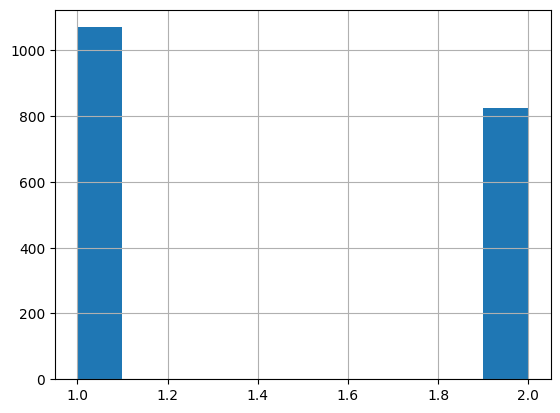

In [217]:
df['Score_home'].hist()

대부분의 경기에서 0~2의 득점을 기록하는 점을 감안하면 RMSE가 1에 근접하는 것은 좋지 않음.  
따라서 이것을 줄여 나가야 해요.